IMPORT IMPORTANT LIBRARIES


In [2]:
import numpy as np
import pandas as pd



In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.cluster import DBSCAN

In [5]:
import matplotlib.pyplot as plt

LOAD THE DATA

In [7]:
data = pd.read_csv('CCD.csv')

SUMMARIZING THE DATA

In [8]:
data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [10]:
data.shape

(660, 7)

In [11]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


PERFORMING EDA

In [12]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
data.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

Removing Unnecessary Columns

In [14]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [15]:
df = data.drop(['Sl_No'], axis=1)

In [16]:
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
...,...,...,...,...,...,...
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0


Converting the Dataset in DataFrame Format to Array

In [17]:
df_array = df.values

In [18]:
df_array

array([[ 87073, 100000,      2,      1,      1,      0],
       [ 38414,  50000,      3,      0,     10,      9],
       [ 17341,  50000,      7,      1,      3,      4],
       ...,
       [ 53834, 145000,      8,      1,      9,      1],
       [ 80655, 172000,     10,      1,     15,      0],
       [ 80150, 167000,      9,      0,     12,      2]])

Applying Standardization to the Dataset

In [20]:
scale = StandardScaler()

In [21]:
x = scale.fit_transform(df_array)

In [22]:
x

array([[ 1.24691971,  1.74018685, -1.24922476, -0.86045063, -0.54748969,
        -1.25153737],
       [-0.65320273,  0.41029254, -0.78758515, -1.47373077,  2.5205186 ,
         1.89185881],
       [-1.47609839,  0.41029254,  1.05897329, -0.86045063,  0.13428993,
         0.1455276 ],
       ...,
       [-0.05105538,  2.93709172,  1.5206129 , -0.86045063,  2.17962879,
        -0.90227113],
       [ 0.99629832,  3.65523464,  2.44389211, -0.86045063,  4.22496765,
        -1.25153737],
       [ 0.97657819,  3.52224521,  1.9822525 , -1.47373077,  3.20229822,
        -0.55300488]])

Loading the Model


In [23]:
df.columns

Index(['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [59]:
model = DBSCAN(eps=0.7, min_samples=5)

In [60]:
model

DBSCAN(eps=0.7)

Displaying the Labels

In [62]:
model.fit(x)

DBSCAN(eps=0.7)

In [63]:
model.labels_

array([-1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  7,  1,  3, -1, -1,
       -1, -1, -1, -1,  2,  0, -1, -1, -1, -1, -1,  2,  0, -1,  0,  8,  2,
       -1, -1,  0,  2,  0, -1, -1,  9, 12, 11,  6,  4,  3,  3, -1,  3, -1,
       -1,  7, -1,  8,  3, -1, -1,  2,  4,  0, -1, -1,  2,  5, -1,  2,  3,
       -1,  3, -1, -1,  1,  1, 10,  2, -1, -1,  5,  9,  7,  0, -1,  0,  6,
       -1,  0, -1, 10, -1,  1, -1,  1, -1,  6, -1,  1, -1,  7,  1, -1,  7,
       -1,  2, -1, 10,  1,  3,  3, -1,  6,  8,  4, -1,  0, -1, -1,  0, -1,
        8, -1, -1,  3, -1,  3,  0,  0, -1, -1,  0,  0, 11,  0, -1,  0, -1,
        0,  8, 10, -1,  0,  2,  0, -1,  0, -1, -1, -1, -1,  9, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1,  5,  6, -1,  5,  0, 10,  2, -1, 10,  0,
        7, -1, -1, 10,  0, -1, -1,  0, 10, -1, 11, -1,  0, -1, -1, -1,  3,
       -1, 11, -1,  5,  0,  2, -1, -1,  7, -1,  9,  1, -1, -1, -1, -1,  0,
        0, -1, -1, -1, -1,  8, -1,  0, -1, -1,  0,  0, -1, -1,  0, -1,  8,
       -1,  4, -1,  4, -1

In [64]:
set(list(model.labels_))



{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22}

In [72]:
class_ = pd.DataFrame(model.labels_,columns=['cluster_values'])

In [73]:
class_

,cluster_values
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
655,-1
656,-1
657,-1
658,-1


Merging the cluster_values to the Entire Dataset

In [74]:
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3
...,...,...,...,...,...,...
655,51108,99000,10,1,10,0
656,60732,84000,10,1,13,2
657,53834,145000,8,1,9,1
658,80655,172000,10,1,15,0


In [75]:
final_df = pd.concat([df,class_],axis=1)

In [70]:
final_df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
0,87073,100000,2,1,1,0,-1
1,38414,50000,3,0,10,9,-1
2,17341,50000,7,1,3,4,-1
3,40496,30000,5,1,1,4,-1
4,47437,100000,6,0,12,3,-1
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,-1
656,60732,84000,10,1,13,2,-1
657,53834,145000,8,1,9,1,-1
658,80655,172000,10,1,15,0,-1


Generating Inference

In [76]:
final_df ['cluster_values'].unique()

array([-1,  0,  7,  1,  3,  2,  8,  9, 12, 11,  6,  4,  5, 10, 15, 13, 14,
       18, 16, 17, 22, 20, 19, 21])

In [77]:
final_df[final_df['cluster_values']==-1]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
0,87073,100000,2,1,1,0,-1
1,38414,50000,3,0,10,9,-1
2,17341,50000,7,1,3,4,-1
3,40496,30000,5,1,1,4,-1
4,47437,100000,6,0,12,3,-1
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,-1
656,60732,84000,10,1,13,2,-1
657,53834,145000,8,1,9,1,-1
658,80655,172000,10,1,15,0,-1


In [78]:
final_df[final_df['cluster_values']==0]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
5,58634,20000,3,0,1,8,0
9,44770,3000,4,0,1,7,0
11,52326,13000,3,0,2,7,0
22,30507,6000,4,1,4,6,0
29,29112,8000,4,0,4,7,0
31,32550,11000,3,1,5,6,0
36,46388,9000,3,1,4,10,0
38,52142,13000,4,1,3,10,0
60,29759,20000,4,1,4,7,0
81,38970,7000,3,1,5,5,0



Visualizing the Result

In [79]:
final_df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_values
0,87073,100000,2,1,1,0,-1
1,38414,50000,3,0,10,9,-1
2,17341,50000,7,1,3,4,-1
3,40496,30000,5,1,1,4,-1
4,47437,100000,6,0,12,3,-1
...,...,...,...,...,...,...,...
655,51108,99000,10,1,10,0,-1
656,60732,84000,10,1,13,2,-1
657,53834,145000,8,1,9,1,-1
658,80655,172000,10,1,15,0,-1


In [80]:
input_x = final_df.iloc[:,:-1].values

In [81]:
input_x

array([[ 87073, 100000,      2,      1,      1,      0],
       [ 38414,  50000,      3,      0,     10,      9],
       [ 17341,  50000,      7,      1,      3,      4],
       ...,
       [ 53834, 145000,      8,      1,      9,      1],
       [ 80655, 172000,     10,      1,     15,      0],
       [ 80150, 167000,      9,      0,     12,      2]])

In [82]:
output_y = final_df.iloc[:,-1].values

In [83]:
output_y

array([-1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  7,  1,  3, -1, -1,
       -1, -1, -1, -1,  2,  0, -1, -1, -1, -1, -1,  2,  0, -1,  0,  8,  2,
       -1, -1,  0,  2,  0, -1, -1,  9, 12, 11,  6,  4,  3,  3, -1,  3, -1,
       -1,  7, -1,  8,  3, -1, -1,  2,  4,  0, -1, -1,  2,  5, -1,  2,  3,
       -1,  3, -1, -1,  1,  1, 10,  2, -1, -1,  5,  9,  7,  0, -1,  0,  6,
       -1,  0, -1, 10, -1,  1, -1,  1, -1,  6, -1,  1, -1,  7,  1, -1,  7,
       -1,  2, -1, 10,  1,  3,  3, -1,  6,  8,  4, -1,  0, -1, -1,  0, -1,
        8, -1, -1,  3, -1,  3,  0,  0, -1, -1,  0,  0, 11,  0, -1,  0, -1,
        0,  8, 10, -1,  0,  2,  0, -1,  0, -1, -1, -1, -1,  9, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1,  5,  6, -1,  5,  0, 10,  2, -1, 10,  0,
        7, -1, -1, 10,  0, -1, -1,  0, 10, -1, 11, -1,  0, -1, -1, -1,  3,
       -1, 11, -1,  5,  0,  2, -1, -1,  7, -1,  9,  1, -1, -1, -1, -1,  0,
        0, -1, -1, -1, -1,  8, -1,  0, -1, -1,  0,  0, -1, -1,  0, -1,  8,
       -1,  4, -1,  4, -1

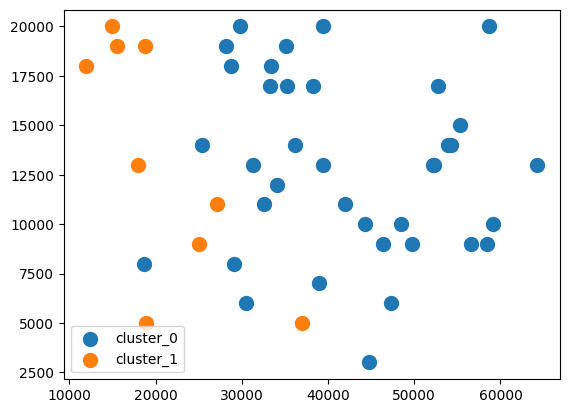

In [84]:
plt.scatter(input_x[output_y==0,0],input_x[output_y==0,1],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,0],input_x[output_y==1,1],s=100, label='cluster_1')
plt.legend()
plt.show()